<a href="https://colab.research.google.com/github/Sweetmonee/colab/blob/main/Now_18.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [24]:
!pip3 install folium
!pip3 install geopandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.0 MB 5.3 MB/s 
     |████████████████████████████████| 6.3 MB 35.3 MB/s 
     |████████████████████████████████| 16.7 MB 43.4 MB/s 


In [ ]:
import geopandas as gpd

In [8]:
import folium
import pandas as pd
import numpy as np
import requests

In [68]:
response = requests.get("https://api.odcloud.kr/api/15096996/v1/uddi:6738a90c-ec96-4245-a187-9528cea62904?page=1&perPage=10&serviceKey=3MCBWEYPV4%2BY4Un8XqdBpFBiaGQKGsEVpC1HIK1DCoHqjNlhaUGcwjBIJGDYeTaTOiG4GKJorKXpGpfNpOEjhQ%3D%3D")
response.text
data = response.json()

oreumdf = pd.DataFrame(data['data'])
oreumdf

,경도,데이터기준일자,비고(m),설명,오름명,오름영문명,위도,위치,표고(m)
0,126.7772830,2021-11-30,51,비고 51m의 원형 화구를 가진 오름이다. 거칠지 않은 산 체와 완만한 탐방로가 있...,아부오름,abu,33.44887500,제주시 구좌읍 송당리,301.4
1,126.8306516,2021-11-30,58,비고 58m의 원형 화구를 지닌 화산체이다. 잡목들이 거의 없어 그늘을 찾기 어렵지...,아끈다랑쉬,akkeundalangswi,33.47413717,제주시 구좌읍 세화리,198.0
2,126.8856750,2021-11-30,154,비고 154m. 말굽형 형태의 오름. 산체가 밤알을 닮아 알밤오름이라 명칭되었다.,알밤오름,albam,33.48075700,제주시 조천읍 선흘리,393.6
3,126.7131350,2021-11-30,51,비고 51m의 원추형 화구를 지닌 화산체이다.,알오름,al,33.48974600,서귀포시 성산읍 시흥리,145.9
4,126.7571260,2021-11-30,93,비고 93m의 말굽형 형태의 오름이다. 오름 전체에 초지가 있고. 소나무. 청미래덩...,안돌오름,andol,33.45581400,제주시 구좌읍 송당리,368.1
5,126.6081240,2021-11-30,91,비고 91m. 말굽형(북동향) 형태의 오름. 오름 기슭 아래에 있는 샘터를 중심으로...,안세미,ansemi,33.46709800,제주시 봉개동,396.4
6,126.7897666,2021-11-30,132,비고 132m의 원형 화구를 지닌 화산체이다. 예부터 약초가 많이 자생하고 있어 백...,백약이오름,baeg-yagi,33.43680944,서귀포시 표선면 성읍리,356.9
7,126.2658540,2021-11-30,43,비고 43m의 북향 말굽형 굼부리를 지닌 화산체. 비고도 낮고 규모도 작은 편이다.,밝은오름,balgeun,33.36093500,제주시 한림읍 상명리,182.5
8,126.6538018,2021-11-30,142,비고 142m의 복합형 화구를 지닌 화산체이다. 바농은 바늘의 제주 방언을 말하며 ...,바농오름,banong,33.45377549,제주시 조천읍 교래리,552.1
9,126.7632900,2021-11-30,109,비고 109m의 말굽형 화산체이다.,비치미오름,bichimi,33.42639500,제주시 구좌읍 송당리,344.1


In [15]:
oreumdf[['경도','위도', '오름명','설명']]

,경도,위도,오름명,설명
0,126.7772830,33.44887500,아부오름,비고 51m의 원형 화구를 가진 오름이다. 거칠지 않은 산 체와 완만한 탐방로가 있...
1,126.8306516,33.47413717,아끈다랑쉬,비고 58m의 원형 화구를 지닌 화산체이다. 잡목들이 거의 없어 그늘을 찾기 어렵지...
2,126.8856750,33.48075700,알밤오름,비고 154m. 말굽형 형태의 오름. 산체가 밤알을 닮아 알밤오름이라 명칭되었다.
3,126.7131350,33.48974600,알오름,비고 51m의 원추형 화구를 지닌 화산체이다.
4,126.7571260,33.45581400,안돌오름,비고 93m의 말굽형 형태의 오름이다. 오름 전체에 초지가 있고. 소나무. 청미래덩...
5,126.6081240,33.46709800,안세미,비고 91m. 말굽형(북동향) 형태의 오름. 오름 기슭 아래에 있는 샘터를 중심으로...
6,126.7897666,33.43680944,백약이오름,비고 132m의 원형 화구를 지닌 화산체이다. 예부터 약초가 많이 자생하고 있어 백...
7,126.2658540,33.36093500,밝은오름,비고 43m의 북향 말굽형 굼부리를 지닌 화산체. 비고도 낮고 규모도 작은 편이다.
8,126.6538018,33.45377549,바농오름,비고 142m의 복합형 화구를 지닌 화산체이다. 바농은 바늘의 제주 방언을 말하며 ...
9,126.7632900,33.42639500,비치미오름,비고 109m의 말굽형 화산체이다.


In [16]:
for idx in oreumdf[['경도','위도', '오름명','설명']].index:
    print(oreumdf[['경도','위도', '오름명','설명']].loc[idx])

경도                                           126.7772830
위도                                           33.44887500
오름명                                                 아부오름
설명     비고 51m의 원형 화구를 가진 오름이다. 거칠지 않은 산 체와 완만한 탐방로가 있...
Name: 0, dtype: object
경도                                           126.8306516
위도                                           33.47413717
오름명                                                아끈다랑쉬
설명     비고 58m의 원형 화구를 지닌 화산체이다. 잡목들이 거의 없어 그늘을 찾기 어렵지...
Name: 1, dtype: object
경도                                       126.8856750
위도                                       33.48075700
오름명                                             알밤오름
설명     비고 154m. 말굽형 형태의 오름. 산체가 밤알을 닮아 알밤오름이라 명칭되었다.
Name: 2, dtype: object
경도                   126.7131350
위도                   33.48974600
오름명                          알오름
설명     비고 51m의 원추형 화구를 지닌 화산체이다.
Name: 3, dtype: object
경도                                           126.7571260
위도                                           33.455

In [70]:
from folium.features import DivIcon
from shapely.geometry import Point, Polygon, MultiPolygon, LineString
import geopandas as gpd

map = folium.Map(
    location = [33.379753	, 126.544722], zoom_start= 11
)


folium.Marker(
    [33.379753	, 126.544722], popup = '<strong>hello</strong>',
    tooltip = 'Click'
).add_to(map)

for n in oreumdf.index:#관광지
    iframe = str(oreumdf['오름명'][n]) +'<br>' + str(oreumdf['위도'][n]) +'<br>'+str(oreumdf['경도'][n])
   
    popup = folium.Popup(iframe, min_width=150, max_width=150)
    folium.CircleMarker([oreumdf['위도'][n], oreumdf['경도'][n]], radius = 10, color = 'green',fill_opacity =1, fill_color = '#58FA82',popup = popup, tooltip = iframe).add_to(map)    
map

In [46]:
x1 , y1 = 1,1
x2 , y2 = 1,3
x3 , y3 = 2,3
x4 , y4 = 2,1


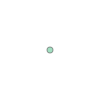

In [47]:
Point([x1,y1])

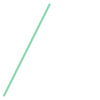

In [51]:
LineString([(x1,y1),(x3,y3)])

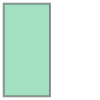

In [52]:
Polygon([(x1,y1),(x2,y2),(x3,y3),(x4,y4)])

In [ ]:
ri_geodf = gpd.read_file('', encoding='cp949').to_crs('EPSG:4326')
ri_geodf

In [54]:
전국시군구1 = gpd.read_file('ctp_rvn.shp', encoding='cp949').to_crs('EPSG:4326')
전국시군구1

,CTPRVN_CD,CTP_ENG_NM,CTP_KOR_NM,geometry
0,11,Seoul,서울특별시,"POLYGON ((127.12667 37.46863, 127.12667 37.468..."
1,26,Busan,부산광역시,"MULTIPOLYGON (((129.11041 35.10108, 129.11196 ..."
2,27,Daegu,대구광역시,"POLYGON ((128.47278 35.83345, 128.47278 35.833..."
3,28,Incheon,인천광역시,"MULTIPOLYGON (((126.34274 37.64355, 126.34254 ..."
4,29,Gwangju,광주광역시,"POLYGON ((126.76029 35.25870, 126.76105 35.258..."
5,30,Daejeon,대전광역시,"POLYGON ((127.39892 36.48910, 127.40016 36.487..."
6,31,Ulsan,울산광역시,"MULTIPOLYGON (((129.34886 35.37410, 129.34886 ..."
7,36,Sejong-si,세종특별자치시,"POLYGON ((127.17841 36.59687, 127.17839 36.596..."
8,41,Gyeonggi-do,경기도,"MULTIPOLYGON (((126.73088 37.04639, 126.73141 ..."
9,42,Gangwon-do,강원도,"MULTIPOLYGON (((129.34455 37.17130, 129.34456 ..."


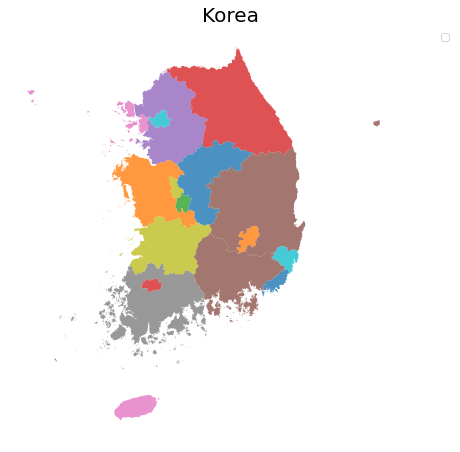

In [56]:
import matplotlib.pyplot as plt
ax = 전국시군구1.plot(column = 'CTP_ENG_NM', figsize = (8,8), alpha = 0.8)
ax.set_title("Korea", fontsize = 20)
ax.set_axis_off()
plt.legend()
plt.show()

In [57]:
oreumdf['경도'] = oreumdf['경도'].astype(float)
oreumdf['위도'] = oreumdf['위도'].astype(float)
oreumdf

,경도,데이터기준일자,비고(m),설명,오름명,오름영문명,위도,위치,표고(m)
0,126.777283,2021-11-30,51,비고 51m의 원형 화구를 가진 오름이다. 거칠지 않은 산 체와 완만한 탐방로가 있...,아부오름,abu,33.448875,제주시 구좌읍 송당리,301.4
1,126.830652,2021-11-30,58,비고 58m의 원형 화구를 지닌 화산체이다. 잡목들이 거의 없어 그늘을 찾기 어렵지...,아끈다랑쉬,akkeundalangswi,33.474137,제주시 구좌읍 세화리,198.0
2,126.885675,2021-11-30,154,비고 154m. 말굽형 형태의 오름. 산체가 밤알을 닮아 알밤오름이라 명칭되었다.,알밤오름,albam,33.480757,제주시 조천읍 선흘리,393.6
3,126.713135,2021-11-30,51,비고 51m의 원추형 화구를 지닌 화산체이다.,알오름,al,33.489746,서귀포시 성산읍 시흥리,145.9
4,126.757126,2021-11-30,93,비고 93m의 말굽형 형태의 오름이다. 오름 전체에 초지가 있고. 소나무. 청미래덩...,안돌오름,andol,33.455814,제주시 구좌읍 송당리,368.1
5,126.608124,2021-11-30,91,비고 91m. 말굽형(북동향) 형태의 오름. 오름 기슭 아래에 있는 샘터를 중심으로...,안세미,ansemi,33.467098,제주시 봉개동,396.4
6,126.789767,2021-11-30,132,비고 132m의 원형 화구를 지닌 화산체이다. 예부터 약초가 많이 자생하고 있어 백...,백약이오름,baeg-yagi,33.436809,서귀포시 표선면 성읍리,356.9
7,126.265854,2021-11-30,43,비고 43m의 북향 말굽형 굼부리를 지닌 화산체. 비고도 낮고 규모도 작은 편이다.,밝은오름,balgeun,33.360935,제주시 한림읍 상명리,182.5
8,126.653802,2021-11-30,142,비고 142m의 복합형 화구를 지닌 화산체이다. 바농은 바늘의 제주 방언을 말하며 ...,바농오름,banong,33.453775,제주시 조천읍 교래리,552.1
9,126.763290,2021-11-30,109,비고 109m의 말굽형 화산체이다.,비치미오름,bichimi,33.426395,제주시 구좌읍 송당리,344.1


In [58]:
oreumdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   경도       10 non-null     float64
 1   데이터기준일자  10 non-null     object 
 2   비고(m)    10 non-null     int64  
 3   설명       10 non-null     object 
 4   오름명      10 non-null     object 
 5   오름영문명    10 non-null     object 
 6   위도       10 non-null     float64
 7   위치       10 non-null     object 
 8   표고(m)    10 non-null     object 
dtypes: float64(2), int64(1), object(6)
memory usage: 848.0+ bytes


In [59]:
oreumdf['geometry'] = oreumdf.apply(lambda x: Point((float(x.경도), float(x.위도))), axis=1)
oreumdf = gpd.GeoDataFrame(oreumdf, geometry = "geometry")
oreumdf.head()

/usr/local/lib/python3.7/dist-packages/pandas/core/dtypes/cast.py:118: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)


,경도,데이터기준일자,비고(m),설명,오름명,오름영문명,위도,위치,표고(m),geometry
0,126.777283,2021-11-30,51,비고 51m의 원형 화구를 가진 오름이다. 거칠지 않은 산 체와 완만한 탐방로가 있...,아부오름,abu,33.448875,제주시 구좌읍 송당리,301.4,POINT (126.77728 33.44888)
1,126.830652,2021-11-30,58,비고 58m의 원형 화구를 지닌 화산체이다. 잡목들이 거의 없어 그늘을 찾기 어렵지...,아끈다랑쉬,akkeundalangswi,33.474137,제주시 구좌읍 세화리,198.0,POINT (126.83065 33.47414)
2,126.885675,2021-11-30,154,비고 154m. 말굽형 형태의 오름. 산체가 밤알을 닮아 알밤오름이라 명칭되었다.,알밤오름,albam,33.480757,제주시 조천읍 선흘리,393.6,POINT (126.88568 33.48076)
3,126.713135,2021-11-30,51,비고 51m의 원추형 화구를 지닌 화산체이다.,알오름,al,33.489746,서귀포시 성산읍 시흥리,145.9,POINT (126.71313 33.48975)
4,126.757126,2021-11-30,93,비고 93m의 말굽형 형태의 오름이다. 오름 전체에 초지가 있고. 소나무. 청미래덩...,안돌오름,andol,33.455814,제주시 구좌읍 송당리,368.1,POINT (126.75713 33.45581)


In [ ]:
#사이킷런
#knu 라이브베이직 랜덤포레스트

In [61]:
oreumdf.crs = {'init':'epsg:4326'}
print(oreumdf.crs)

+init=epsg:4326 +type=crs


In [64]:
oreumdf = oreumdf.to_crs({'init':'epsg:5179'})


AttributeError: ignored

In [71]:
!pip install haversine

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [72]:
# 그룹박스, 체크박스

In [ ]:
from folium.features import DivIcon
from shapely.geometry import Point, Polygon, MultiPolygon, LineString
import geopandas as gpd

map = folium.Map(
    location = [33.379753	, 126.544722], zoom_start= 11
)


folium.Marker(
    [33.379753	, 126.544722], popup = '<strong>hello</strong>',
    tooltip = 'Click'
).add_to(map)

for n in oreumdf.index:#관광지
    iframe = str(oreumdf['오름명'][n]) +'<br>' + str(oreumdf['위도'][n]) +'<br>'+str(oreumdf['경도'][n])
   
    popup = folium.Popup(iframe, min_width=150, max_width=150)
    folium.CircleMarker([oreumdf['위도'][n], oreumdf['경도'][n]], radius = 10, color = 'green',fill_opacity =1, fill_color = '#58FA82',popup = popup, tooltip = iframe).add_to(map)    
map